In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("advspend.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

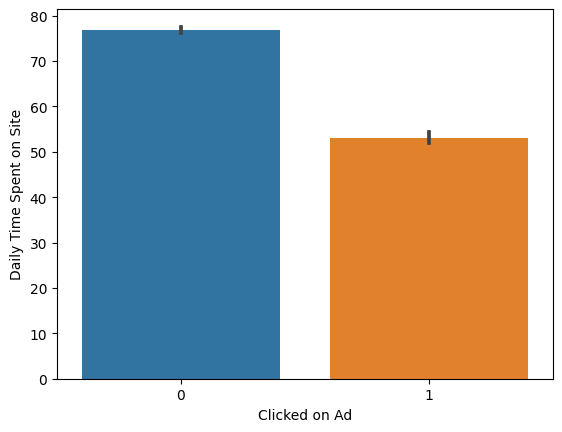

In [3]:
sns.barplot(x=data['Clicked on Ad'],y=data['Daily Time Spent on Site'])

In [4]:
print(data[data['Clicked on Ad']==1]['Country'].value_counts()[:5])

Australia        7
Ethiopia         7
Turkey           7
South Africa     6
Liechtenstein    6
Name: Country, dtype: int64


In [5]:
print(data.count())

Daily Time Spent on Site    1000
Age                         1000
Area Income                 1000
Daily Internet Usage        1000
Ad Topic Line               1000
City                        1000
Male                        1000
Country                     1000
Timestamp                   1000
Clicked on Ad               1000
dtype: int64


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Male'>

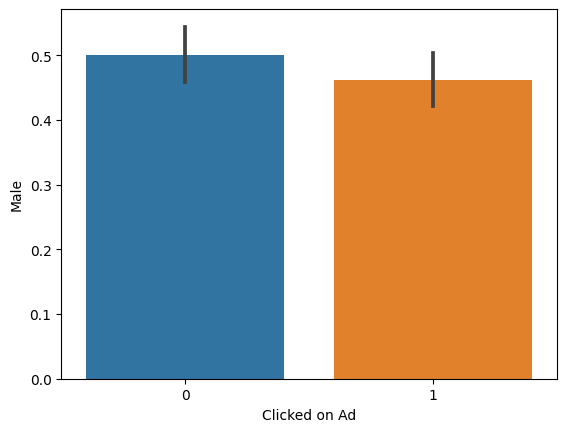

In [6]:
sns.barplot(x = data['Clicked on Ad'],y=data['Male'])

<AxesSubplot:>

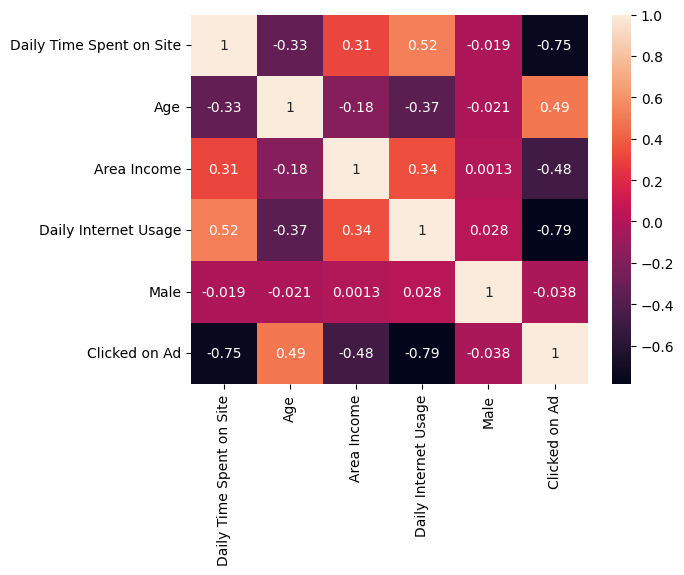

In [7]:
sns.heatmap(data.corr(),annot=True)

In [8]:
Imp_data = data[['Daily Time Spent on Site','Clicked on Ad','Timestamp']]
Imp_data.head()

,Daily Time Spent on Site,Clicked on Ad,Timestamp
0,68.95,0,2016-03-27 00:53:11
1,80.23,0,2016-04-04 01:39:02
2,69.47,0,2016-03-13 20:35:42
3,74.15,0,2016-01-10 02:31:19
4,68.37,0,2016-06-03 03:36:18


In [9]:
Imp_data['month'] = pd.DatetimeIndex(Imp_data['Timestamp']).month
Imp_data['day'] = pd.DatetimeIndex(Imp_data['Timestamp']).day

/home/dark/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dark/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
data_ = Imp_data.drop("Timestamp",axis=1)
data_.head()

,Daily Time Spent on Site,Clicked on Ad,month,day
0,68.95,0,3,27
1,80.23,0,4,4
2,69.47,0,3,13
3,74.15,0,1,10
4,68.37,0,6,3


In [11]:
data_.corr()

,Daily Time Spent on Site,Clicked on Ad,month,day
Daily Time Spent on Site,1.000000,-0.748117,-0.010920,-0.011217
Clicked on Ad,-0.748117,1.000000,0.016095,-0.005269
month,-0.010920,0.016095,1.000000,-0.017274
day,-0.011217,-0.005269,-0.017274,1.000000


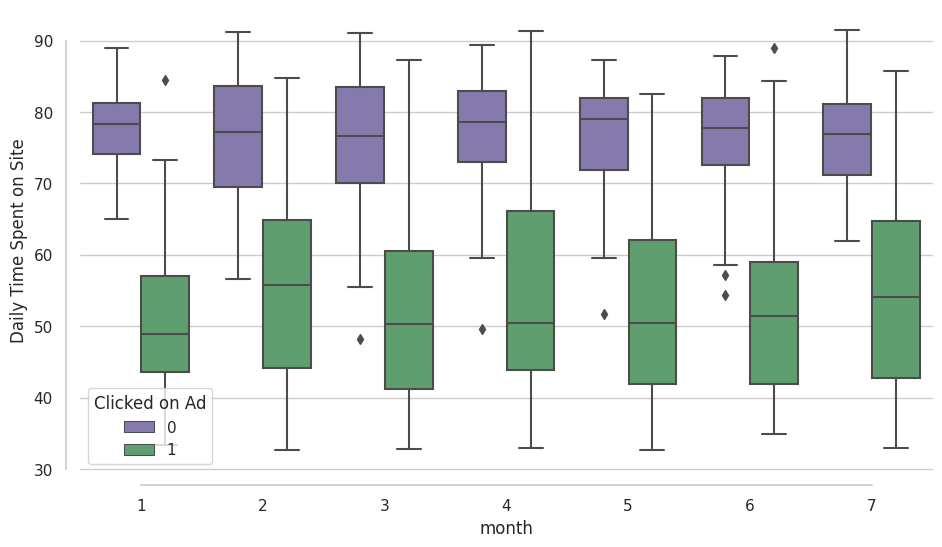

In [12]:
sns.set_theme(style="whitegrid")
f,ax = plt.subplots(figsize=(11,6))
sns.boxplot(x="month",y="Daily Time Spent on Site",data=data_,hue="Clicked on Ad",palette=['m','g'])
sns.despine(offset=10,trim=True)

In [13]:
data_[(data_["month"]==7) | (data_["month"]==4)]['Clicked on Ad'].value_counts()

0    124
1    124
Name: Clicked on Ad, dtype: int64

In [14]:
print(data_[data_['Clicked on Ad']==1]['Daily Time Spent on Site'].max())
print(data_[data_['Clicked on Ad']==0]['Daily Time Spent on Site'].max())

91.37
91.43


In [15]:
print(data_[data_['Clicked on Ad']==1]['Daily Time Spent on Site'].min())
print(data_[data_['Clicked on Ad']==0]['Daily Time Spent on Site'].min())

32.6
48.22


In [19]:
clusters = pd.read_csv("Compressed_data.csv")
clusters.head()

,A,B,C,D,E,F,G,H,clusters
0,-1.150672,-2.162566,3.994892,6.618181,5.214929,-1.108929,0.263203,-2.562965,6
1,-2.394285,-1.477326,3.683768,6.424458,5.580158,-1.990460,0.299140,-2.551447,6
2,-2.623309,-1.354071,2.248332,5.424079,5.157923,-1.513553,0.687413,-1.323825,6
3,-2.645118,-1.045560,3.470584,6.470068,5.452596,-1.663606,0.323628,-2.894979,6
4,-1.753454,-2.467356,4.006952,5.563749,3.803477,-1.083701,-0.017345,-0.996623,6
